# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Notebook Key
Author: GC Belinario


### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [6]:
# import packages here
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# integration with Trapezoidal Rule

## define a function for the given mathematical function
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

## function for true integral
def f_int(x):
    return (2/5)*x**5 + x**3 + 2*x**2 + 5*x

## domain
a = 0
b = 5

## check true value of integral
true_value = f_int(b) - f_int(a)
print(f"True Integral = {true_value}")

## define a function that uses trapezoidal rule
def int_trap(a,b,N):
    h = (b-a)/N
    s = 0.5*(f(b)+f(a))
    for k in range(1,N):
        s += f(a+k*h)

    return h*s

## numerical integration for N = 10, 100, 1000 slices
results_trap = [int_trap(a,b,N) for N in [10,100,1000]]

for result in results_trap:
    slice = results_trap.index(result)
    N = 10**(slice+1)
    print(f"For N={N}: Area = {result}, %Error = {100*abs(result-true_value)/true_value}%")

True Integral = 1450.0
For N=10: Area = 1471.4375, %Error = 1.478448275862069%
For N=100: Area = 1450.2145812500003, %Error = 0.01479870689656999%
For N=1000: Area = 1450.0021458331234, %Error = 0.00014798849127240326%


In [8]:
## define a function that uses Simpson's rule
def int_simp(a,b,N):
    h = (b-a)/N
    s = f(a) + f(b)
    for k in range(1,N,2):
        s += 4*f(a+k*h)
    for k in range(2,N,2):
        s += 2*f(a+k*h)

    return (h/3)*s

results_simp = [int_simp(a,b,N) for N in [10,100,1000]]

## check true value of integral
print(f"True Integral = {true_value}")

## numerical integration for N = 10, 100, 1000 slices
for result in results_simp:
    slice = results_simp.index(result)
    N = 10**(slice+1)
    print(f"For N={N}: Area = {result}, %Error = {100*abs(result-true_value)/true_value}%")

True Integral = 1450.0
For N=10: Area = 1450.0833333333333, %Error = 0.005747126436776382%
For N=100: Area = 1450.0000083333337, %Error = 5.747126657485657e-07%
For N=1000: Area = 1450.0000000008342, %Error = 5.753338035870472e-11%


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [10]:
# define the gaussxw function based on Newman script
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [11]:
## integration using Gaussian Quadrature

## reuse the same function and same integration details with the previous item
def f(x):
    return 2*x**4 + 3*x**2 + 4*x + 5

## function for true integral
def f_int(x):
    return (2/5)*x**5 + x**3 + 2*x**2 + 5*x

## domain
a = 0
b = 5

## check true value of integral
true_value = f_int(b) - f_int(a)
print(f"True Integral = {true_value}")

N_gauss = 3
s_gauss = 0

x_k, w_k = gaussxwab(N=N_gauss, a=a, b=b)

for k in range(N_gauss):
    s_gauss += w_k[k]*f(x_k[k])

print(f"For N=3: Area={s_gauss}, $Error={100*abs(s_gauss-true_value)/true_value}%")

True Integral = 1450.0
For N=3: Area=1450.000000000002, $Error=1.4112848820614404e-13%


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [13]:
import numpy as np

## define the potential function
def V(x):
    return x**4

## define the function for the period
def period(a,m,N):
    c = np.sqrt(8*m)
    
    xk, wk = gaussxwab(N=N, a=0, b=a)
    
    s = 0
    for k in range(N):
        s += wk[k]*((V(a)-V(xk[k]))**(-1/2))

    return c*s

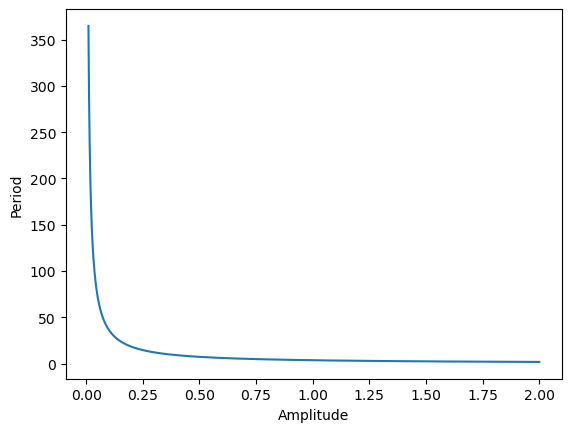

In [22]:
import warnings
warnings.filterwarnings("ignore")

m = 1
N = 20

x = np.linspace(0.01,2,10000)
periods = np.array([period(a=xa, m=1, N=N) for xa in x])
plt.xlabel("Amplitude")
plt.ylabel("Period")

plt.plot(x, periods)